Representaciones varias de otras cosas que no son simulaciones

In [1]:
import matplotlib.pyplot as plt
import helpers

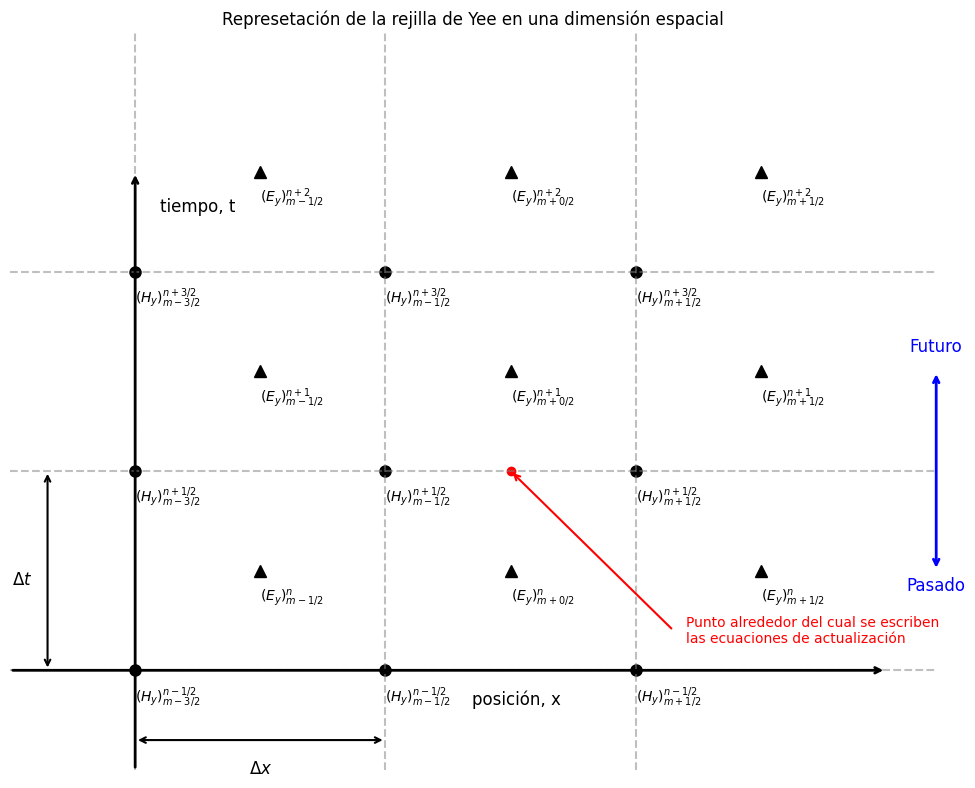

In [5]:
# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Define grid positions
x_positions = [0, 1, 2]  # m-1, m, m+1
t_positions = [0, 1, 2]   # time levels

# Define spacing
dx = 1.0
dt = 1.0

# Create grid points
# H
for i, x in enumerate(x_positions):
    for j, t in enumerate(t_positions):
        # Plot grid points
        # H
        ax.plot(x*dx, t*dt, 'ko', markersize=8)
        # E
        ax.plot(x*dx + 0.5, t*dt + 0.5, 'k^', markersize=8)


# Add grid lines
for x in x_positions:
    ax.axvline(x*dx, color='gray', linestyle='--', alpha=0.5)
for t in t_positions:
    ax.axhline(t*dt, color='gray', linestyle='--', alpha=0.5)

labels_H = [
    ['$(H_y)^{n-1/2}_{m' + f'{i:+}/2' +'}$' for i in range(-3, 2, 2)],
    ['$(H_y)^{n+1/2}_{m' + f'{i:+}/2' +'}$' for i in range(-3, 2, 2)],
    ['$(H_y)^{n+3/2}_{m' + f'{i:+}/2' +'}$' for i in range(-3, 2, 2)]
]

labels_E = [
    ['$(E_y)^{n}_{m' + f'{i:+}/2' + '}$' for i in range(-1, 2)],
    ['$(E_y)^{n+1}_{m' + f'{i:+}/2' + '}$' for i in range(-1, 2)],
    ['$(E_y)^{n+2}_{m' + f'{i:+}/2' + '}$' for i in range(-1, 2)]
]

# Position labels
for i, x in enumerate(x_positions):
    for j, t in enumerate(t_positions):
        # H
        ax.text(x*dx, t*dt-0.15, labels_H[j][i], fontsize=10) # ha='center', va='top', 
        # E
        ax.text(x*dx + 0.5, t*dt-0.15 + 0.5, labels_E[j][i], fontsize=10) # , ha='center', va='top'

# Add arrows and labels for axes
ax.annotate('', xy=(0, 2.5), xytext=(0, -0.5), 
            arrowprops=dict(arrowstyle='->', lw=2, color='black'))
ax.text(0.1, 2.3, 'tiempo, t', fontsize=12, ha='left')

ax.annotate('', xy=(3, 0), xytext=(-0.5, 0), 
            arrowprops=dict(arrowstyle='->', lw=2, color='black'))
ax.text(1.7, -0.1, 'posición, x', fontsize=12, ha='right', va='top')

# Add Future/Past labels
ax.text(3.2, 1.6, 'Futuro', fontsize=12, color='blue', ha='center')
ax.text(3.2, 0.4, 'Pasado', fontsize=12, color='blue', ha='center')

# Add arrow between Future and Past
ax.annotate('', xy=(3.2, 1.5), xytext=(3.2, 0.5), 
            arrowprops=dict(arrowstyle='<->', lw=2, color='blue'))

# Add delta x annotation
ax.annotate('', xy=(0, -0.35), xytext=(dx, -0.35), 
            arrowprops=dict(arrowstyle='<->', lw=1.5, color='black'))
ax.text(0.5, -0.45, r'$\Delta x$', fontsize=12, ha='center', va='top')

# Add delta t annotation
ax.annotate('', xy=(-0.35, 0), xytext=(-0.35, dt), 
            arrowprops=dict(arrowstyle='<->', lw=1.5, color='black'))
ax.text(-0.45, 0.5, r'$\Delta t$', fontsize=12, ha='center', va='top')

# Add the red curved arrow and annotation
# Create a curved arrow pointing to the center point

ax.scatter([1.5], [1], color="red")
ax.annotate('', xy=(1.5, 1), xytext=(2.15, 0.2), 
            arrowprops=dict(arrowstyle='->', lw=1.5, color='red'))

# Add text annotation
ax.text(2.2, 0.2, 'Punto alrededor del cual se escriben\nlas ecuaciones de actualización', 
        fontsize=10, color='red', ha='left', va='center')

# Set axis limits and remove ticks
ax.set_xlim(-0.5, 3.2)
ax.set_ylim(-0.5, 3.2)
ax.set_xticks([])
ax.set_yticks([])

# Remove axis spines
for spine in ax.spines.values():
    spine.set_visible(False)

plt.title("Represetación de la rejilla de Yee en una dimensión espacial")

plt.tight_layout()
plt.savefig("figures/yee_grid.png")

T 30.011682674906563 6.972944795900909 (266, 133, 1)
H 0.30002290196104575 0.0499574771347863 (266, 133, 1)
T 29.633396392006688 3.1211467584777077 (266, 133, 1)
H 0.2962491916576345 0.027849738608185095 (266, 133, 1)
n 1.0005448016546399 1.6293216076329015e-07 (266, 133, 1)


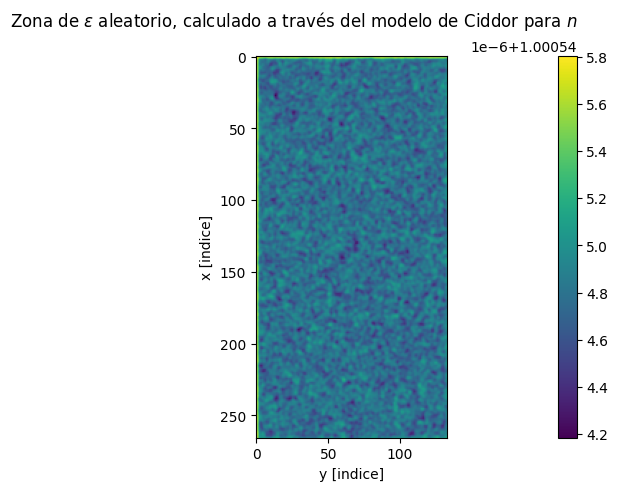

In [4]:
longitud_onda = 2e-6

T, h = 30, 0.3
std_T, std_h = 7, 0.05

b = 10
std_kernel = 1 # (1, 2, 1)
kernel = helpers.gaussian_kernel_nd((b, b, 1), std_kernel)

p = helpers.create_patch_temperature_ciddor(longitud_onda=longitud_onda, mean_T=T, std_T=std_T, mean_h=h, std_h=std_h, kernel=kernel)

fig, ax = plt.subplots(constrained_layout=True)

ax.set_xlabel("y [indice]")
ax.set_ylabel("x [indice]")

# ax.set_xticks([i for i in range(0, p.shape[1], p.shape[1]//3)], [i for i in range(25, 25+p.shape[1], p.shape[1]//3)])
# ax.set_yticks([i for i in range(0, p.shape[0], p.shape[0]//6)], [i for i in range(70, 70+p.shape[0], p.shape[0]//6)])

im = ax.imshow(p)
fig.suptitle(r"Zona de $\epsilon$ aleatorio, calculado a través del modelo de Ciddor para $n$")

plt.colorbar(im)
plt.savefig("figures/perm_aletoria_ciddor.png")